#  Personality Type Prediction

### Team: 
#### 2019UCS2021-Monika Sharma
#### 2019UCS2048-Nupur Sudhakar
#### 2019UCS2066-Snigdha Gupta

### 1. Problem definition
Today’s world is witnessing great increase in the use of Social Media. People use them as a platform to share their feelings, emotions and experiences along with lot of personal information. All such information could be used in advantageous ways to help increase the Business and understand the user need. Personality prediction has gained lot of focus nowadays. It studies behavior of users and reflects the thinking, feelings etc.<br>
The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types types across 4 axis:
<ul>
<li>Introversion (I) – Extroversion (E)
<li>Intuition (N) – Sensing (S)
<li>Thinking (T) – Feeling (F)
<li>Judging (J) – Perceiving (P)
</ul>
Aim to produce a machine learning model that can attempt to determine a person’s personality type based on some text they have written.


### 2. Possible solution
We will use classification alogorithms to predict the personality types

### 3. Dataset used
(MBTI) Myers-Briggs Personality Type Dataset

### 4. Pre-processing on dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
plt.rcParams['figure.figsize']=(12,8)

### Importing dataset and EDA

In [5]:
df=pd.read_csv("mbti_1.csv")
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [6]:
df.shape

(8675, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [8]:
df.isnull().sum()

type     0
posts    0
dtype: int64

In [9]:
df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,"'I'd post this on the INTJ board, but perhaps ..."
freq,1832,1


### Visualization

In [10]:
mbti=df['type'].unique()
mbti

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [11]:
df1=df.groupby(['type']).count()
df1.reset_index(inplace=True)
df1['n_words']=df['posts'].apply(lambda x: len(x.split()))
df1

,type,posts,n_words
0,ENFJ,190,556
1,ENFP,675,1170
2,ENTJ,231,836
3,ENTP,685,1064
4,ESFJ,42,967
5,ESFP,48,1491
6,ESTJ,39,1329
7,ESTP,89,1223
8,INFJ,1470,738
9,INFP,1832,1233


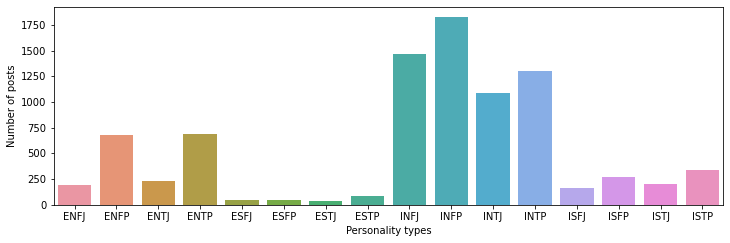

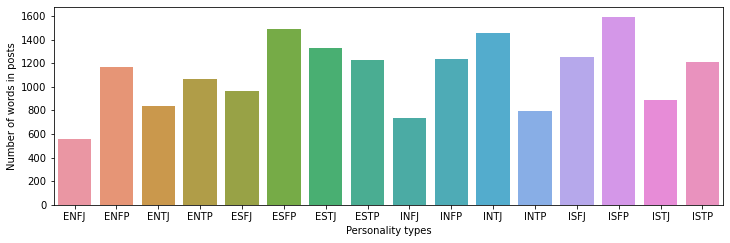

In [12]:
plt.subplot(2,1,1)
sns.barplot(x=df1['type'], y=df1['posts'])
plt.xlabel('Personality types')
plt.ylabel('Number of posts')
plt.show()
plt.subplot(2,1,2)
sns.barplot(x=df1['type'], y=df1['n_words'])
plt.xlabel('Personality types')
plt.ylabel('Number of words in posts')
plt.show()

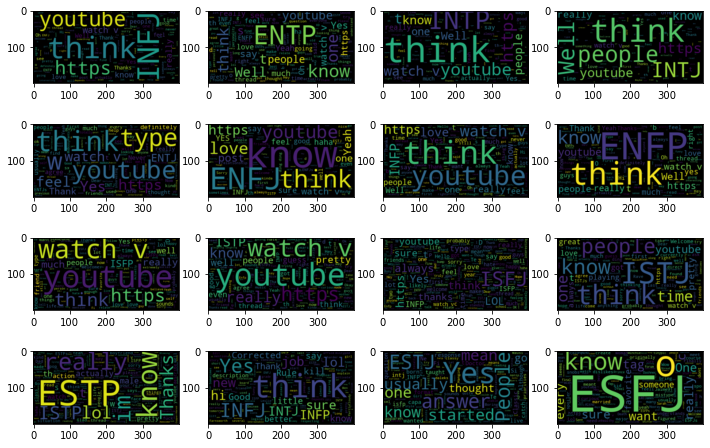

In [13]:
j=1
for i in df['type'].unique():
    plt.subplot(4,4,j)
    j+=1
    words=WordCloud(max_words=1500,relative_scaling=1,normalize_plurals=False).generate(df[df['type'] == i]['posts'].to_string())
    plt.imshow(words, interpolation='bilinear')
plt.show()


### Data cleaning & Processing

In [14]:
posts=df['posts']
mbti=[x.lower() for x in mbti]
posts, mbti

(0       'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
 1       'I'm finding the lack of me in these posts ver...
 2       'Good one  _____   https://www.youtube.com/wat...
 3       'Dear INTP,   I enjoyed our conversation the o...
 4       'You're fired.|||That's another silly misconce...
                               ...                        
 8670    'https://www.youtube.com/watch?v=t8edHB_h908||...
 8671    'So...if this thread already exists someplace ...
 8672    'So many questions when i do these things.  I ...
 8673    'I am very conflicted right now when it comes ...
 8674    'It has been too long since I have been on per...
 Name: posts, Length: 8675, dtype: object,
 ['infj',
  'entp',
  'intp',
  'intj',
  'entj',
  'enfj',
  'infp',
  'enfp',
  'isfp',
  'istp',
  'isfj',
  'istj',
  'estp',
  'esfp',
  'estj',
  'esfj'])

In [15]:
df["posts"] = df["posts"].apply(lambda x: x.lower()) #to lowercase
df["posts"] = df["posts"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," "))) #url
df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^\w\s]','',x)) #single letter digit
df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x)) #not in set a-z A-Z 
df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) #remove 0 to 3 letter word
df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x)) #remove 30 to 3000 letter word
x = re.compile("(" + "|".join(mbti) + ")") 
df['posts'] = df['posts'].replace(to_replace =x,value ="", regex= True)
df["n_words"] = df["posts"].apply(lambda x: len(re.findall(r'\w+', x)))
df=df[df["n_words"] >= 15] #conidering where no of words are atleast 15

In [16]:
"(" + "|".join(mbti) + ")"

'(infj|entp|intp|intj|entj|enfj|infp|enfp|isfp|istp|isfj|istj|estp|esfp|estj|esfj)'

In [20]:
df

,type,posts,n_words
0,INFJ,moments sportscenter plays prank...,336
1,ENTP,finding lack these posts very alarming ...,628
2,INTP,good course which know thats bles...,516
3,INTJ,dear enjoyed conversation other esoter...,600
4,ENTJ,youre fired thats another silly misconceptio...,578
...,...,...,...
8670,ISFP,ixfp just because always think cats doms...,489
8671,ENFP,soif this thread already exists someplace else...,724
8672,INTP,many questions when these things would ta...,551
8673,INFP,very conflicted right when comes wanting ...,948


In [21]:
# Introversion (I) 1 – Extroversion (E)0
# Intuition (N)1 – Sensing (S)0
# Thinking (T)1 – Feeling (F)0
# Judging (J)1 – Perceiving (P)0

In [22]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E not found') 
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S not found')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F not found')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P not found')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

df=df.join(df.apply (lambda row: get_types(row),axis=1))
df.head(5)

,type,posts,n_words,IE,NS,TF,JP
0,INFJ,moments sportscenter plays prank...,336,1,1,0,1
1,ENTP,finding lack these posts very alarming ...,628,0,1,1,0
2,INTP,good course which know thats bles...,516,1,1,1,0
3,INTJ,dear enjoyed conversation other esoter...,600,1,1,1,1
4,ENTJ,youre fired thats another silly misconceptio...,578,0,1,1,1


In [23]:
print(df['IE'].value_counts())
print(df['NS'].value_counts())
print(df['TF'].value_counts())
print(df['JP'].value_counts())

1    6674
0    1999
Name: IE, dtype: int64
1    7477
0    1196
Name: NS, dtype: int64
0    4693
1    3980
Name: TF, dtype: int64
0    5239
1    3434
Name: JP, dtype: int64


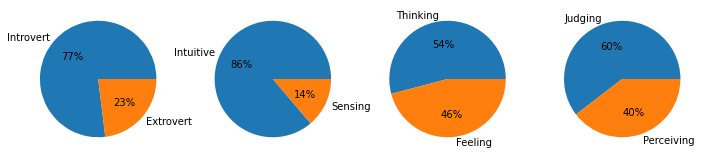

In [24]:
plt.subplot(1,4,1)
plt.pie(df['IE'].value_counts(),labels=['Introvert','Extrovert'],autopct='%.0f%%')
plt.subplot(1,4,2)
plt.pie(df['NS'].value_counts(),labels=['Intuitive','Sensing'],autopct='%.0f%%')
plt.subplot(1,4,3)
plt.pie(df['TF'].value_counts(),labels=['Thinking','Feeling'],autopct='%.0f%%')
plt.subplot(1,4,4)
plt.pie(df['JP'].value_counts(),labels=['Judging','Perceiving'],autopct='%.0f%%')
plt.show()

<AxesSubplot:>

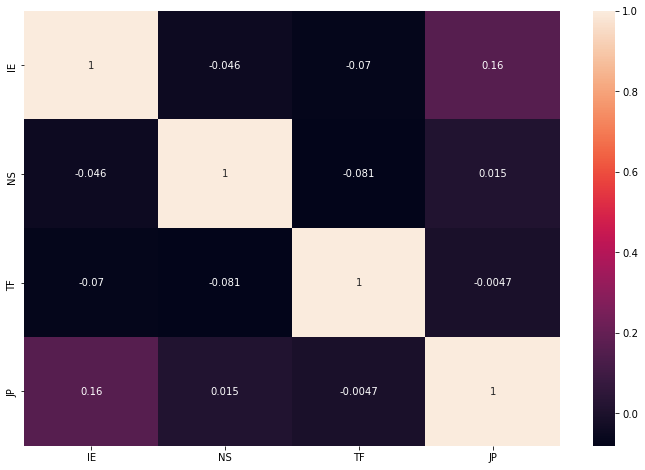

In [25]:
sns.heatmap(df[['IE','NS','TF','JP']].corr(), annot=True)

In [26]:
vectorizer=CountVectorizer(stop_words='english')
X=vectorizer.fit_transform(df["posts"])

In [27]:
Y=df.iloc[:,3:]
Y

,IE,NS,TF,JP
0,1,1,0,1
1,0,1,1,0
2,1,1,1,0
3,1,1,1,1
4,0,1,1,1
...,...,...,...,...
8670,1,0,0,0
8671,0,1,0,0
8672,1,1,1,0
8673,1,1,0,0


In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((6938, 137901), (6938, 4), (1735, 137901), (1735, 4))

In [29]:
y_test1=y_test['IE']
y_test2=y_test['NS']
y_test3=y_test['TF']
y_test4=y_test['JP']
y_train1=y_train['IE']
y_train2=y_train['NS']
y_train3=y_train['TF']
y_train4=y_train['JP']

### 5.  ML Model and Evaluation
We'll implement classification algorithms like SVM, Logistic Regression, Naive Bayes, XGBoost, Random forest and check which algorithm gives best accuracy on the dataset. 

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
def train_model(model,X_train,Y_train,X_test,Y_test):
    model.fit(X_train,Y_train)
    prediction=model.predict(X_test)
    score=accuracy_score(Y_test,prediction)
    print(classification_report(Y_test,prediction),score)
    return score

In [32]:
model=[SVC(),LogisticRegression(),MultinomialNB(),XGBClassifier(), RandomForestClassifier(n_estimators=1000, random_state=0)]

In [33]:
#IE
score1=[]
for i in model:
    x=train_model(i,x_train,y_train1,x_test,y_test1)
    score1.append(x)
result1=dict(zip(model,score1))
result1

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       408
           1       0.76      1.00      0.87      1327

    accuracy                           0.76      1735
   macro avg       0.38      0.50      0.43      1735
weighted avg       0.58      0.76      0.66      1735
 0.7648414985590778
              precision    recall  f1-score   support

           0       0.45      0.33      0.38       408
           1       0.81      0.87      0.84      1327

    accuracy                           0.75      1735
   macro avg       0.63      0.60      0.61      1735
weighted avg       0.73      0.75      0.73      1735
 0.7469740634005764
              precision    recall  f1-score   support

           0       0.45      0.10      0.16       408
           1       0.78      0.96      0.86      1327

    accuracy                           0.76      1735
   macro avg       0.61      0.53      0.51      1735
weighted avg       0.70      0.76   

{SVC(): 0.7648414985590778,
 LogisticRegression(): 0.7469740634005764,
 MultinomialNB(): 0.7596541786743516,
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.300000012,
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=4,
               num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None): 0.7648414985590778,
 RandomForestClassifier(n_estimators=1000, random_state=0): 0.7648414985590778}

In [34]:
#NS
score2=[]
for i in model:
    x=train_model(i,x_train,y_train2,x_test,y_test2)
    score2.append(x)
result2=dict(zip(model,score2))
result2

              precision    recall  f1-score   support

           0       0.50      0.00      0.01       257
           1       0.85      1.00      0.92      1478

    accuracy                           0.85      1735
   macro avg       0.68      0.50      0.46      1735
weighted avg       0.80      0.85      0.78      1735
 0.8518731988472622
              precision    recall  f1-score   support

           0       0.43      0.25      0.31       257
           1       0.88      0.94      0.91      1478

    accuracy                           0.84      1735
   macro avg       0.65      0.59      0.61      1735
weighted avg       0.81      0.84      0.82      1735
 0.8403458213256484
              precision    recall  f1-score   support

           0       0.42      0.06      0.11       257
           1       0.86      0.99      0.92      1478

    accuracy                           0.85      1735
   macro avg       0.64      0.52      0.51      1735
weighted avg       0.79      0.85   

{SVC(): 0.8518731988472622,
 LogisticRegression(): 0.8403458213256484,
 MultinomialNB(): 0.8484149855907781,
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.300000012,
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=4,
               num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None): 0.8570605187319885,
 RandomForestClassifier(n_estimators=1000, random_state=0): 0.8524495677233429}

In [35]:
#TF
score3=[]
for i in model:
    x=train_model(i,x_train,y_train3,x_test,y_test3)
    score3.append(x)
result3=dict(zip(model,score3))
result3

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       927
           1       0.75      0.76      0.76       808

    accuracy                           0.77      1735
   macro avg       0.77      0.77      0.77      1735
weighted avg       0.77      0.77      0.77      1735
 0.7717579250720461
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       927
           1       0.76      0.73      0.74       808

    accuracy                           0.77      1735
   macro avg       0.76      0.76      0.76      1735
weighted avg       0.77      0.77      0.77      1735
 0.7654178674351585
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       927
           1       0.79      0.67      0.72       808

    accuracy                           0.76      1735
   macro avg       0.77      0.76      0.76      1735
weighted avg       0.76      0.76   

{SVC(): 0.7717579250720461,
 LogisticRegression(): 0.7654178674351585,
 MultinomialNB(): 0.7613832853025937,
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.300000012,
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=4,
               num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None): 0.7406340057636888,
 RandomForestClassifier(n_estimators=1000, random_state=0): 0.7152737752161383}

In [36]:
#JP
score4=[]
for i in model:
    x=train_model(i,x_train,y_train4,x_test,y_test4)
    score4.append(x)
result4=dict(zip(model,score4))
result4

              precision    recall  f1-score   support

           0       0.65      0.87      0.75      1070
           1       0.56      0.26      0.35       665

    accuracy                           0.64      1735
   macro avg       0.61      0.57      0.55      1735
weighted avg       0.62      0.64      0.60      1735
 0.6368876080691642
              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1070
           1       0.50      0.47      0.48       665

    accuracy                           0.62      1735
   macro avg       0.59      0.59      0.59      1735
weighted avg       0.61      0.62      0.61      1735
 0.6161383285302594
              precision    recall  f1-score   support

           0       0.68      0.85      0.76      1070
           1       0.59      0.35      0.44       665

    accuracy                           0.66      1735
   macro avg       0.64      0.60      0.60      1735
weighted avg       0.65      0.66   

{SVC(): 0.6368876080691642,
 LogisticRegression(): 0.6161383285302594,
 MultinomialNB(): 0.6593659942363113,
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.300000012,
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=4,
               num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None): 0.631700288184438,
 RandomForestClassifier(n_estimators=1000, random_state=0): 0.6184438040345821}